In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
# Importing the pandas library for data manipulation and analysis

import re
# Importing the re module for regular expressions, useful for text processing

from nltk.corpus import stopwords
# Importing the stopwords from nltk.corpus to filter out common words that do not add much meaning

from nltk.stem import PorterStemmer
# Importing the PorterStemmer from nltk.stem to perform stemming (reducing words to their root form)

from nltk.tokenize import word_tokenize
# Importing word_tokenize from nltk.tokenize to split text into individual words (tokens)

from sklearn.model_selection import train_test_split
# Importing train_test_split from sklearn.model_selection to split the dataset into training and testing sets

from sklearn.feature_extraction.text import TfidfVectorizer
# Importing TfidfVectorizer from sklearn.feature_extraction.text to convert text data into TF-IDF feature vectors

import nltk
# Importing the nltk library, which is a leading platform for building Python programs to work with human language data

from sklearn.linear_model import LogisticRegression
# Importing LogisticRegression from sklearn.linear_model to build a logistic regression model for classification

from sklearn.preprocessing import LabelEncoder
# Importing LabelEncoder from sklearn.preprocessing to encode target labels with value between 0 and n_classes-1

from sklearn.metrics import classification_report
# Importing classification_report from sklearn.metrics to evaluate the performance of the classification model

import joblib
# Importing joblib for saving and loading models efficiently

nltk.download('stopwords')
# Downloading the stopwords dataset from nltk

import matplotlib.pyplot as plt
# Importing matplotlib.pyplot for data visualization

from wordcloud import WordCloud
# Importing WordCloud from wordcloud to generate word cloud visualizations


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#reading the csv files that i have
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
val = pd.read_csv('val.csv')

In [4]:
#print the first 5 rows of train data
print(train.head())

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [5]:
#print the first 5 rows of test data
print(test.head())

                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0


In [6]:
#print the first 5 rows of validation data
print(val.head())

                                                text  label
0  im feeling quite sad and sorry for myself but ...      0
1  i feel like i am still looking at a blank canv...      0
2                     i feel like a faithful servant      2
3                  i am just feeling cranky and blue      3
4  i can have for a treat or if i am feeling festive      1


In [7]:
def preprocess_text(text):
    # Function to preprocess the input text
    
    # Remove punctuation using regular expressions
    text = re.sub(r'\W', ' ', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove stopwords (common words that do not add much meaning)
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text

# Applying the preprocess_text function to the 'text' column of the train, test, and validation datasets
train['text'] = train['text'].apply(preprocess_text)
test['text'] = test['text'].apply(preprocess_text)
val['text'] = val['text'].apply(preprocess_text)

In [8]:
#printing the first 5 rows after preprocessing for test data
print(test.head())

                                                text  label
0        im feeling rather rotten im ambitious right      0
1                       im updating blog feel shitty      0
2    never make separate ever want feel like ashamed      0
3  left bouquet red yellow tulips arm feeling sli...      1
4                            feeling little vain one      0


In [9]:
#printing the first 5 rows after preprocessing for train data
print(train.head())

                                                text  label
0                              didnt feel humiliated      0
1  go feeling hopeless damned hopeful around some...      0
2          im grabbing minute post feel greedy wrong      3
3  ever feeling nostalgic fireplace know still pr...      2
4                                    feeling grouchy      3


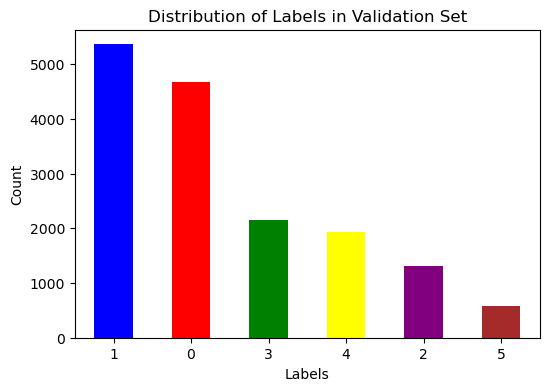

In [10]:
plt.figure(figsize=(6, 4))
# Create a new figure for plotting with a specified size of 6x4 inches

train['label'].value_counts().plot(kind='bar', color=['blue', 'red', 'green', 'yellow', 'purple', 'brown'])
# Plot the distribution of labels in the training set as a bar chart
# The value_counts() method counts the number of occurrences of each label
# The kind='bar' argument specifies that a bar chart should be plotted
# The color argument specifies the colors of the bars

plt.title('Distribution of Labels in Validation Set')
# Set the title of the plot

plt.xlabel('Labels')
# Set the label for the x-axis

plt.ylabel('Count')
# Set the label for the y-axis

plt.xticks(rotation=0)
# Set the rotation of the x-axis tick labels to 0 degrees (horizontal)

plt.show()
# Display the plot


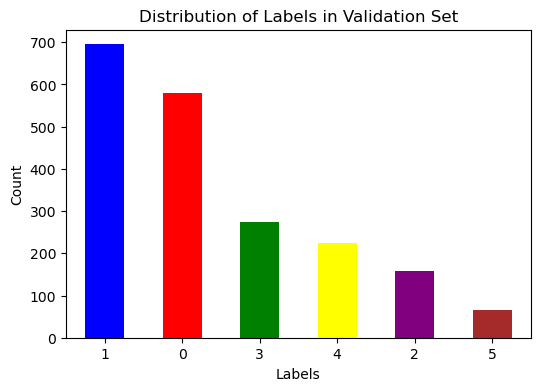

In [11]:
plt.figure(figsize=(6, 4))
# Create a new figure for plotting with a specified size of 6x4 inches

test['label'].value_counts().plot(kind='bar', color=['blue', 'red', 'green', 'yellow', 'purple', 'brown'])
# Plot the distribution of labels in the test set as a bar chart
# The value_counts() method counts the number of occurrences of each label
# The kind='bar' argument specifies that a bar chart should be plotted
# The color argument specifies the colors of the bars

plt.title('Distribution of Labels in Validation Set')
# Set the title of the plot

plt.xlabel('Labels')
# Set the label for the x-axis

plt.ylabel('Count')
# Set the label for the y-axis

plt.xticks(rotation=0)
# Set the rotation of the x-axis tick labels to 0 degrees (horizontal)

plt.show()
# Display the plot


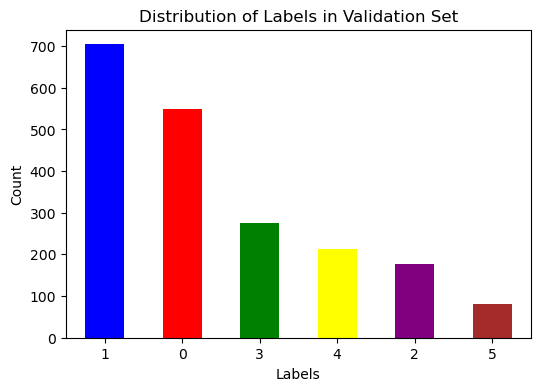

In [12]:
# Plot the distribution of labels in the validation set before training
plt.figure(figsize=(6, 4))
# Create a new figure for plotting with a specified size of 6x4 inches

val['label'].value_counts().plot(kind='bar', color=['blue', 'red', 'green', 'yellow', 'purple', 'brown'])
# Plot the distribution of labels in the validation set as a bar chart
# The value_counts() method counts the number of occurrences of each label
# The kind='bar' argument specifies that a bar chart should be plotted
# The color argument specifies the colors of the bars

plt.title('Distribution of Labels in Validation Set')
# Set the title of the plot

plt.xlabel('Labels')
# Set the label for the x-axis

plt.ylabel('Count')
# Set the label for the y-axis

plt.xticks(rotation=0)
# Set the rotation of the x-axis tick labels to 0 degrees (horizontal)

plt.show()
# Display the plot

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       550
           1       0.86      0.95      0.90       704
           2       0.90      0.71      0.79       178
           3       0.91      0.85      0.88       275
           4       0.87      0.74      0.80       212
           5       0.85      0.65      0.74        81

    accuracy                           0.88      2000
   macro avg       0.88      0.80      0.84      2000
weighted avg       0.88      0.88      0.87      2000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       581
           1       0.85      0.95      0.90       695
           2       0.79      0.64      0.70       159
           3       0.89      0.81      0.85       275
           4       0.87      0.83      0.85       224
           5       0.92      0.53      0.67        66

    accuracy   

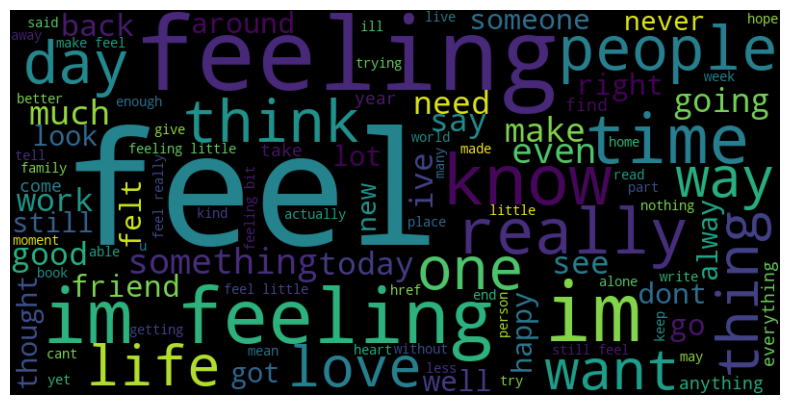

In [13]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
# Create an instance of TfidfVectorizer to convert text data into TF-IDF feature vectors, ignoring English stop words

# Fit and transform the training data
X_train = vectorizer.fit_transform(train['text'])
# Fit the vectorizer on the training text data and transform it into TF-IDF feature vectors
y_train = train['label']
# Assign the training labels to y_train

# Transform the validation and test data
X_val = vectorizer.transform(val['text'])
# Transform the validation text data into TF-IDF feature vectors
y_val = val['label']
# Assign the validation labels to y_val

X_test = vectorizer.transform(test['text'])
# Transform the test text data into TF-IDF feature vectors
y_test = test['label']
# Assign the test labels to y_test

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Create an instance of LabelEncoder to encode target labels with values between 0 and n_classes-1

# Encode the labels
y_train_encoded = label_encoder.fit_transform(y_train)
# Fit the label encoder on the training labels and transform them
y_val_encoded = label_encoder.transform(y_val)
# Transform the validation labels
y_test_encoded = label_encoder.transform(y_test)
# Transform the test labels

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
# Create an instance of LogisticRegression with a maximum of 1000 iterations
model.fit(X_train, y_train_encoded)
# Train the logistic regression model on the training data

# Validate the model
y_val_pred = model.predict(X_val)
# Predict the labels for the validation data
print("Validation Classification Report:")
# Print a heading for the validation classification report
print(classification_report(y_val_encoded, y_val_pred))
# Print the classification report for the validation data

# Test the model
y_test_pred = model.predict(X_test)
# Predict the labels for the test data
print("Test Classification Report:")
# Print a heading for the test classification report
print(classification_report(y_test_encoded, y_test_pred))
# Print the classification report for the test data

# Save the model and vectorizer for future use
joblib.dump(model, 'logistic_regression_model.pkl')
# Save the trained logistic regression model to a file
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
# Save the TF-IDF vectorizer to a file

# Optionally, visualize the most frequent words using a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(train['text']))
# Generate a word cloud from the training text data
plt.figure(figsize=(10, 5))
# Create a new figure for the word cloud with a specified size of 10x5 inches
plt.imshow(wordcloud, interpolation='bilinear')
# Display the word cloud with bilinear interpolation
plt.axis('off')
# Turn off the axis
plt.show()
# Display the plot

In [14]:
joblib.dump(model, 'logistic_regression_model.pkl')
# Save the trained logistic regression model to a file named 'logistic_regression_model.pkl' using joblib
# This is done to preserve the trained model so it can be loaded and used later without retraining.
# The .pkl file is a pickle file that stores the model in a serialized format, which allows it to be easily loaded back into memory.

joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
# Save the TF-IDF vectorizer to a file named 'tfidf_vectorizer.pkl' using joblib
# This is done to preserve the fitted vectorizer so it can be used later to transform new text data consistently.
# The .pkl file is a pickle file that stores the vectorizer in a serialized format, enabling it to be reloaded and reused.


['tfidf_vectorizer.pkl']

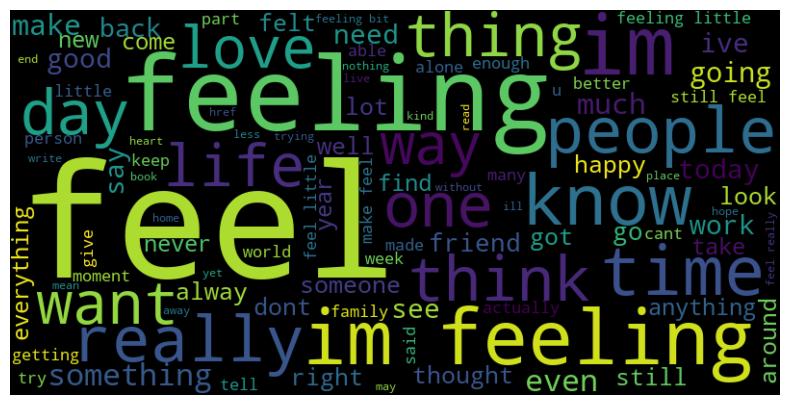

In [15]:
# Generate a WordCloud object from the training text data
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(train['text']))
# Create a WordCloud object with specified width, height, and maximum number of words
# The ' '.join(train['text']) concatenates all text data in the 'text' column of the training set into a single string

# Create a new figure for plotting with a specified size of 10x5 inches
plt.figure(figsize=(10, 5))

# Display the WordCloud using bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')

# Turn off the axis
plt.axis('off')

# Show the WordCloud plot
plt.show()

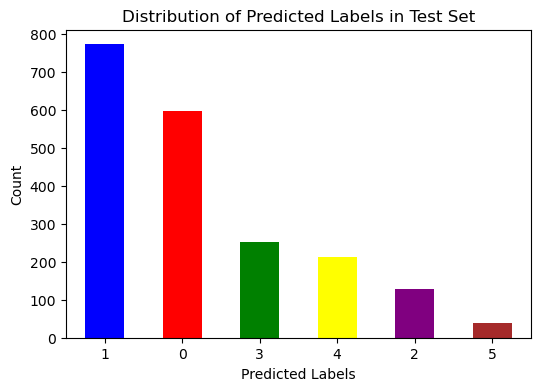

In [16]:
# Predict labels for the test data
y_test_pred = model.predict(X_test)
# Use the trained model to predict labels for the test data

# Plot the distribution of predicted labels in the test set
plt.figure(figsize=(6, 4))
# Create a new figure for plotting with a specified size of 6x4 inches

pd.Series(y_test_pred).value_counts().plot(kind='bar', color=['blue', 'red', 'green', 'yellow', 'purple', 'brown'])
# Plot the distribution of predicted labels in the test set as a bar chart
# The pd.Series(y_test_pred).value_counts() method counts the number of occurrences of each predicted label
# The kind='bar' argument specifies that a bar chart should be plotted
# The color argument specifies the colors of the bars

plt.title('Distribution of Predicted Labels in Test Set')
# Set the title of the plot

plt.xlabel('Predicted Labels')
# Set the label for the x-axis

plt.ylabel('Count')
# Set the label for the y-axis

plt.xticks(rotation=0)
# Set the rotation of the x-axis tick labels to 0 degrees (horizontal)

plt.show()
# Display the plot

In [17]:
# Initialize TfidfVectorizer with specified parameters
vectorizer = TfidfVectorizer(stop_words='english', max_features=14870)
# Create an instance of TfidfVectorizer with the following settings:
# - Stop words are removed using the English stop words list
# - The maximum number of features (words) is set to 14870

# Fit and transform the training data using the vectorizer
X_train = vectorizer.fit_transform(train['text'])
# Fit the vectorizer on the training text data and transform it into TF-IDF feature vectors
# The resulting TF-IDF matrix is stored in X_train

# Save the fitted vectorizer along with the other components
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
# Save the fitted TF-IDF vectorizer to a file named 'tfidf_vectorizer.pkl' using joblib
# This allows the vectorizer to be reused later for transforming new text data consistently

['tfidf_vectorizer.pkl']

In [18]:
# Save the trained logistic regression model to a file
joblib.dump(model, 'logistic_regression_model.pkl')
# This saves the trained logistic regression model to a file named 'logistic_regression_model.pkl' using joblib.
# The model can be loaded and used for predictions without retraining.

# Save the fitted TF-IDF vectorizer to a file
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
# This saves the fitted TF-IDF vectorizer to a file named 'tfidf_vectorizer.pkl' using joblib.
# The vectorizer can be loaded and used to transform new text data consistently.

# Save the label encoder to a file
joblib.dump(label_encoder, 'label_encoder.pkl')
# This saves the label encoder to a file named 'label_encoder.pkl' using joblib.
# The label encoder can be loaded and used to encode target labels in the same way as during training.

['label_encoder.pkl']

In [19]:
# Load the saved logistic regression model from file
model = joblib.load('logistic_regression_model.pkl')
# This loads the previously saved logistic regression model from the file 'logistic_regression_model.pkl'
# Now, the 'model' variable contains the trained logistic regression model that was saved earlier.

# Load the saved TF-IDF vectorizer from file
vectorizer = joblib.load('tfidf_vectorizer.pkl')
# This loads the previously saved TF-IDF vectorizer from the file 'tfidf_vectorizer.pkl'
# Now, the 'vectorizer' variable contains the fitted TF-IDF vectorizer that was saved earlier.

# Load the saved label encoder from file
label_encoder = joblib.load('label_encoder.pkl')
# This loads the previously saved label encoder from the file 'label_encoder.pkl'
# Now, the 'label_encoder' variable contains the label encoder that was saved earlier.

In [21]:
from sklearn.metrics import accuracy_score
# Importing the accuracy_score function from sklearn.metrics module

# Predict labels for the test data using the trained model
y_pred = model.predict(X_test)
# Use the trained logistic regression model to predict labels for the test data

# Calculate accuracy by comparing predicted labels with true labels
accuracy = accuracy_score(y_test, y_pred)
# Calculate the accuracy of the model's predictions on the test data by comparing predicted labels (y_pred) with true labels (y_test)

print(f"Accuracy on test data: {accuracy:.2f}")
# Print the accuracy score on the test data, formatted to two decimal places

Accuracy on test data: 0.87


In [22]:
# Define the emotion mapping
emotion_mapping = {0: "sad", 1: "happy", 2: "wistfulness", 3: "anger/irritation", 4: "confused", 5: "drowsy humor"}
# Define a dictionary that maps encoded emotion labels to their corresponding emotions

# Write a comment and predict its emotion
new_comment = "I feel angry"
# Define a new comment for emotion prediction

predicted_emotion = predict_emotion(new_comment)
# Predict the emotion of the new comment using the defined function

print(f"The predicted emotion for the comment is: {predicted_emotion}")
# Print the predicted emotion for the new comment

The predicted emotion for the comment is: 3
